## Análise exploratória dos dados

No primeiro momento, foi realizado uma análise exploratória dos dadaset afim de verificar possíveis inconsistências nos dados.

In [7]:
# Bibliotecas
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
# Dados
# customer original
df_customer = pd.read_csv("dados/customer_original.csv")

# customer nps
df_nps = pd.read_csv("dados/customer_nps.csv")

# sutomer social
df_social = pd.read_csv("dados/customer_social.csv")



In [9]:
df_customer.head(15)

,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,cpf
0,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),118.75,8672.45,No,104.332.181-00
1,71,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,118.65,8477.60,No,960.013.389-14
2,68,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Mailed check,118.60,7990.05,No,083.863.794-99
3,61,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,One year,Yes,Electronic check,118.60,7365.70,No,026.542.351-14
4,67,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),118.35,7804.15,Yes,161.559.407-89
5,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,118.20,8547.15,No,816.184.959-50
6,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),117.80,8684.80,Yes,310.341.316-56
7,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),117.60,8308.90,No,475.255.341-44
8,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),117.50,8670.10,No,928.327.648-51
9,48,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Month-to-month,No,Electronic check,117.45,5438.90,Yes,350.305.641-60


In [10]:
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7234 entries, 0 to 7233
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   tenure            7234 non-null   int64  
 1   PhoneService      7234 non-null   object 
 2   MultipleLines     7234 non-null   object 
 3   InternetService   7234 non-null   object 
 4   OnlineSecurity    7234 non-null   object 
 5   OnlineBackup      7234 non-null   object 
 6   DeviceProtection  7234 non-null   object 
 7   TechSupport       7234 non-null   object 
 8   StreamingTV       7234 non-null   object 
 9   StreamingMovies   7234 non-null   object 
 10  Contract          7234 non-null   object 
 11  PaperlessBilling  7234 non-null   object 
 12  PaymentMethod     7234 non-null   object 
 13  MonthlyCharges    7234 non-null   float64
 14  TotalCharges      7234 non-null   float64
 15  Churn             7234 non-null   object 
 16  cpf               7234 non-null   object 


In [11]:
print(f"Duplicatas completas: {df_customer.duplicated().sum()}")

Duplicatas completas: 168


In [12]:
df_customer.duplicated().value_counts()

False    7066
True      168
Name: count, dtype: int64

In [13]:
# Limpando os CPFs 
df_customer['cpf'] = df_customer['cpf'].str.replace(r'\D', '', regex=True)


In [14]:
# Checando duplicatas
df_customer[df_customer.duplicated(subset='cpf', keep=False)]


,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,cpf
0,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),118.75,8672.45,No,10433218100
1,71,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,118.65,8477.60,No,96001338914
2,68,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Mailed check,118.60,7990.05,No,08386379499
3,61,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,One year,Yes,Electronic check,118.60,7365.70,No,02654235114
4,67,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),118.35,7804.15,Yes,16155940789
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7196,35,Yes,Yes,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,86.45,3029.10,Yes,71912038110
7197,30,Yes,No,Fiber optic,No,No,Yes,No,No,Yes,One year,No,Electronic check,86.45,2538.05,No,87692082804
7198,27,Yes,Yes,Fiber optic,No,Yes,Yes,No,No,No,Month-to-month,Yes,Bank transfer (automatic),86.45,2401.05,No,32308981334
7207,46,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,No,One year,Yes,Bank transfer (automatic),91.30,4126.35,No,33720948404


Foram identificados valores duplicados de CPF que foram posteriormente removidos

In [15]:
#cpfs_repetidos = df_customer['cpf'][df_customer['cpf'].duplicated()].unique()#
#print(cpfs_repetidos)

In [16]:
df_customer=df_customer.drop_duplicates(subset='cpf', keep='first')
#df_customer[df_customer.duplicated(subset='cpf', keep=False)]

df_customer.duplicated().value_counts()

False    7065
Name: count, dtype: int64

In [17]:
# Verificando NAs
df_customer[df_customer.isna().any(axis=1)]
# Resultados sem NAs

,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,cpf


In [18]:
df_nps.duplicated().value_counts()

False    7065
True      169
Name: count, dtype: int64

In [19]:
df_social.duplicated().value_counts()

False    7065
True      169
Name: count, dtype: int64

In [20]:
df_nps=df_nps.drop_duplicates(subset='cpf', keep='first')
df_nps.duplicated().value_counts()

False    7065
Name: count, dtype: int64

In [21]:
df_social=df_social.drop_duplicates(subset='cpf', keep='first')
df_social.duplicated().value_counts()


False    7065
Name: count, dtype: int64

In [22]:
#assert df_customer['cpf'].equals(df_nps['cpf']) and df_customer['cpf'].equals(df_social['cpf']), "CPFs não estão na mesma ordem!"

In [23]:
for df in [df_customer, df_nps, df_social]:
    df['cpf'] = (
        df['cpf']
        .astype(str)              
        .str.replace(r'\.|\-| ', '', regex=True)  
        .str.zfill(11)            
    )

In [24]:
#df_nps.info()
#df_customer.info()
#df_social.info()

In [25]:
# Juntando os bancos de dados
df_temp = pd.merge(df_customer, df_nps, on='cpf', how='inner')
df_final = pd.merge(df_temp, df_social, on='cpf', how='inner')
df_final.head(25)

,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,...,PaymentMethod,MonthlyCharges,TotalCharges,Churn,cpf,NPS,gender,SeniorCitizen,Partner,Dependents
0,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,...,Bank transfer (automatic),118.75,8672.45,No,10433218100,9,Female,0,Yes,Yes
1,71,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,...,Electronic check,118.65,8477.60,No,96001338914,9,Female,0,No,No
2,68,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,...,Mailed check,118.60,7990.05,No,08386379499,9,Female,0,Yes,No
3,61,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,...,Electronic check,118.60,7365.70,No,02654235114,8,Female,0,No,No
4,67,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,...,Bank transfer (automatic),118.35,7804.15,Yes,16155940789,9,Male,0,No,No
5,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,...,Electronic check,118.20,8547.15,No,81618495950,9,Male,0,No,No
6,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,...,Bank transfer (automatic),117.80,8684.80,Yes,31034131656,9,Male,0,Yes,No
7,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,...,Bank transfer (automatic),117.60,8308.90,No,47525534144,9,Female,0,Yes,Yes
8,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,...,Credit card (automatic),117.50,8670.10,No,92832764851,10,Female,0,Yes,Yes
9,48,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,...,Electronic check,117.45,5438.90,Yes,35030564160,7,Female,1,Yes,No


In [26]:
df_final.duplicated().value_counts()

False    7065
Name: count, dtype: int64

In [27]:
df_final.to_csv("datasets_unidos.csv", index=False, encoding="utf-8")


## Análise Descritiva

In [28]:
df_final['cpf'].value_counts()

cpf
20410372883    1
10433218100    1
96001338914    1
08386379499    1
02654235114    1
              ..
26916697857    1
53287101269    1
23884969692    1
39537672409    1
35030564160    1
Name: count, Length: 7065, dtype: int64

In [29]:
df_final['churn_bin'] = df_final['Churn'].map({'Yes':1, 'No':0})

In [ ]:
#df_final.describe()
# Na variável TotalCharges, há um índíviduo com o máximo de 224122.9, é um valor muito alto quanto comparado com 
#os outros valores - Verificar a necessidade de remover esse CPF do dataset.

,tenure,MonthlyCharges,TotalCharges,NPS,SeniorCitizen,churn_bin
count,7065.000000,7065.000000,7065.00000,7065.000000,7065.000000,7065.000000
mean,32.426185,66.701026,2499.55230,7.158386,0.162208,0.265534
std,24.536293,46.396168,5277.61309,2.649434,0.368668,0.441649
min,1.000000,2.800000,18.80000,0.000000,0.000000,0.000000
25%,9.000000,35.750000,402.60000,5.000000,0.000000,0.000000
50%,29.000000,70.450000,1403.10000,8.000000,0.000000,0.000000
75%,55.000000,90.050000,3836.30000,9.000000,0.000000,1.000000
max,72.000000,990.300000,224122.90000,10.000000,1.000000,1.000000


In [39]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7065 entries, 0 to 7064
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   tenure            7065 non-null   int64  
 1   PhoneService      7065 non-null   object 
 2   MultipleLines     7065 non-null   object 
 3   InternetService   7065 non-null   object 
 4   OnlineSecurity    7065 non-null   object 
 5   OnlineBackup      7065 non-null   object 
 6   DeviceProtection  7065 non-null   object 
 7   TechSupport       7065 non-null   object 
 8   StreamingTV       7065 non-null   object 
 9   StreamingMovies   7065 non-null   object 
 10  Contract          7065 non-null   object 
 11  PaperlessBilling  7065 non-null   object 
 12  PaymentMethod     7065 non-null   object 
 13  MonthlyCharges    7065 non-null   float64
 14  TotalCharges      7065 non-null   float64
 15  Churn             7065 non-null   object 
 16  cpf               7065 non-null   object 


In [42]:
cat_cols = df_final.select_dtypes(include=['object']).columns.tolist()
cat_cols = [col for col in cat_cols if col not in ['Churn', 'cpf']] 

In [43]:
def calculate_churn_rate(df, column):
    return (df.groupby(column)['churn_bin']
            .mean()
            .mul(100)
            .round(2)
            .reset_index()
            .rename(columns={'churn_bin': 'Churn'}))

# Gerar relatório para cada coluna categórica
for col in cat_cols:
    print(f"\n**Churn Rate para {col}:**")
    churn_df = calculate_churn_rate(df_final, col)
    display(churn_df)
    
    # Opcional: destacar a categoria com maior churn
    max_churn = churn_df.loc[churn_df['Churn'].idxmax()]
    print(f"-> Maior Churn: '{max_churn[col]}' com {max_churn['Churn']}%")


**Churn Rate para PhoneService:**


,PhoneService,Churn
0,No,25.00
1,Yes,26.72


-> Maior Churn: 'Yes' com 26.72%

**Churn Rate para MultipleLines:**


,MultipleLines,Churn
0,No,25.02
1,No phone service,25.00
2,Yes,28.65


-> Maior Churn: 'Yes' com 28.65%

**Churn Rate para InternetService:**


,InternetService,Churn
0,DSL,18.96
1,Fiber optic,41.89
2,No,7.50


-> Maior Churn: 'Fiber optic' com 41.89%

**Churn Rate para OnlineSecurity:**


,OnlineSecurity,Churn
0,No,41.76
1,No internet service,7.50
2,Yes,14.66


-> Maior Churn: 'No' com 41.76%

**Churn Rate para OnlineBackup:**


,OnlineBackup,Churn
0,No,39.86
1,No internet service,7.50
2,Yes,21.61


-> Maior Churn: 'No' com 39.86%

**Churn Rate para DeviceProtection:**


,DeviceProtection,Churn
0,No,39.13
1,No internet service,7.50
2,Yes,22.50


-> Maior Churn: 'No' com 39.13%

**Churn Rate para TechSupport:**


,TechSupport,Churn
0,No,41.62
1,No internet service,7.50
2,Yes,15.19


-> Maior Churn: 'No' com 41.62%

**Churn Rate para StreamingTV:**


,StreamingTV,Churn
0,No,33.46
1,No internet service,7.50
2,Yes,30.14


-> Maior Churn: 'No' com 33.46%

**Churn Rate para StreamingMovies:**


,StreamingMovies,Churn
0,No,33.66
1,No internet service,7.50
2,Yes,29.98


-> Maior Churn: 'No' com 33.66%

**Churn Rate para Contract:**


,Contract,Churn
0,Month-to-month,42.69
1,One year,11.22
2,Two year,2.89


-> Maior Churn: 'Month-to-month' com 42.69%

**Churn Rate para PaperlessBilling:**


,PaperlessBilling,Churn
0,No,16.41
1,Yes,33.52


-> Maior Churn: 'Yes' com 33.52%

**Churn Rate para PaymentMethod:**


,PaymentMethod,Churn
0,Bank transfer (automatic),16.72
1,Credit card (automatic),15.27
2,Electronic check,45.24
3,Mailed check,19.23


-> Maior Churn: 'Electronic check' com 45.24%

**Churn Rate para gender:**


,gender,Churn
0,Female,26.99
1,Male,26.12


-> Maior Churn: 'Female' com 26.99%

**Churn Rate para Partner:**


,Partner,Churn
0,No,32.93
1,Yes,19.71


-> Maior Churn: 'No' com 32.93%

**Churn Rate para Dependents:**


,Dependents,Churn
0,No,31.26
1,Yes,15.52


-> Maior Churn: 'No' com 31.26%


## Análise do NPS

In [49]:
df_final['NPS'].describe()

count    7065.000000
mean        7.158386
std         2.649434
min         0.000000
25%         5.000000
50%         8.000000
75%         9.000000
max        10.000000
Name: NPS, dtype: float64

In [ ]:
# Função para Classificar o NPS
def classica_nps(score):
    if score >= 9:
        return 'Promotor'
    elif score <=  6:
        return 'Detrator'
    else:
        return 'Neutro'

In [80]:
df['Categorias_NPS'] = df_final['NPS'].apply(classica_nps)

counts = df['Categorias_NPS'].value_counts()

print(counts)


promotores = (counts.get('Promotor', 0) / len(df_final))*100
detratores = (counts.get('Detrator', 0) / len(df_final))*100

nps = promotores - detratores
print(round(nps,2))

Categorias_NPS
Promotor    3001
Detrator    2466
Neutro      1565
Name: count, dtype: int64
7.57


In [82]:
print("\n--- Distribuição NPS ---")
print(f"Promotores (9-10): {counts.get('Promotor', 0)} clientes ({promotores:.1f}%)")
print(f"Neutros (7-8): {counts.get('Neutro', 0)} clientes ({counts.get('Neutro', 0) / len(df_final) * 100:.1f}%)")
print(f"Detratores (0-6): {counts.get('Detrator', 0)} clientes ({detratores:.1f}%)")
print(f"\n>>> NPS Total: {nps:.1f} <<<")


--- Distribuição NPS ---
Promotores (9-10): 3001 clientes (42.5%)
Neutros (7-8): 1565 clientes (22.2%)
Detratores (0-6): 2466 clientes (34.9%)

>>> NPS Total: 7.6 <<<


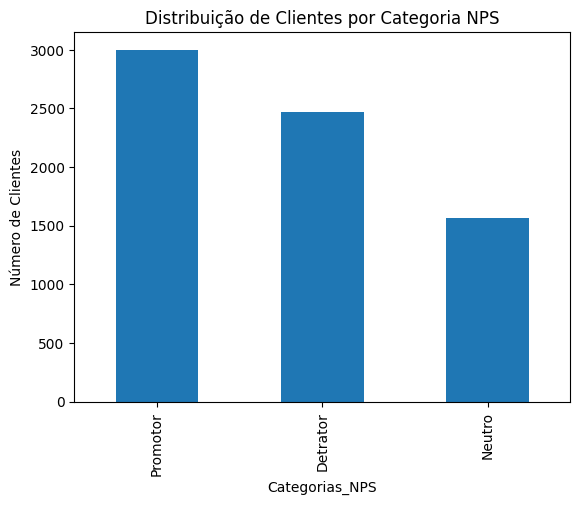

In [86]:
counts.plot(kind='bar') #, color=['green', 'red', 'blue']
plt.title('Distribuição de Clientes por Categoria NPS')
plt.ylabel('Número de Clientes')
plt.show()

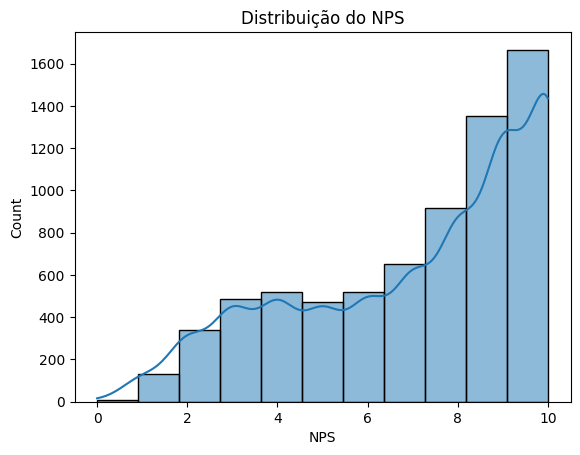

In [44]:
sns.histplot(data=df_final, x='NPS', bins=11, kde=True)
plt.title('Distribuição do NPS')
plt.show()

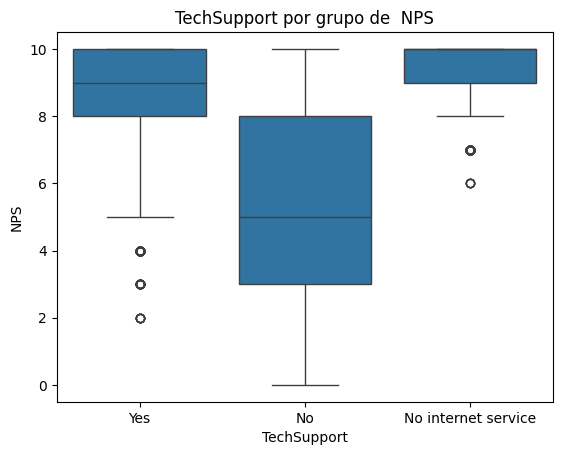

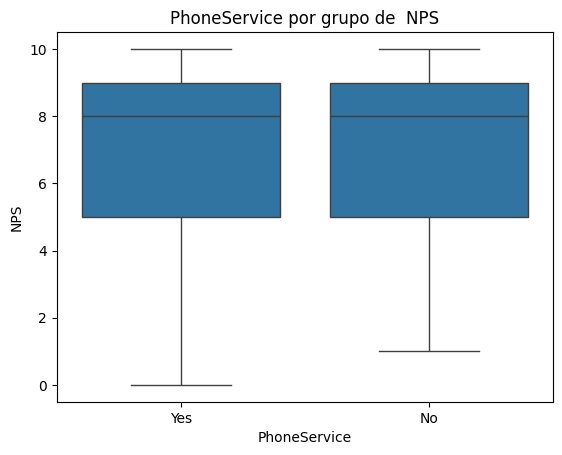

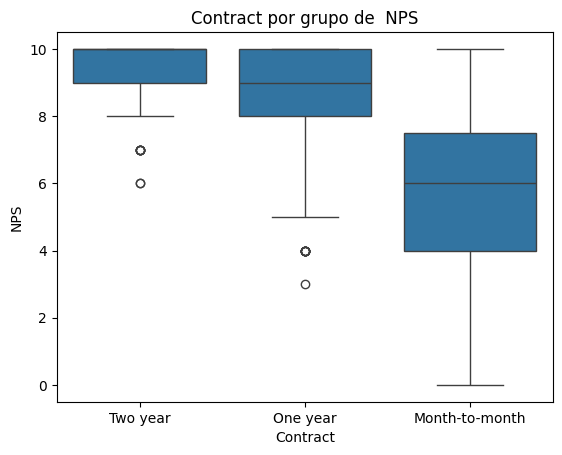

In [93]:
nome_cols = ['TechSupport','PhoneService', 'Contract' ]

for col in nome_cols:
    sns.boxplot(data=df_final, x=col, y='NPS')
    plt.title(f"{col} por grupo de  NPS")
    plt.show()

In [46]:
nps_score = (df_final[df_final['NPS'] >= 9].shape[0] / df_final.shape[0] * 100) - (df_final[df_final['NPS'] <= 6].shape[0] / df_final.shape[0] * 100)
print(f"NPS Agregado: {nps_score:.2f}")

NPS Agregado: 7.70
